In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/master/Social_Network_Ads.csv")
print(df.dtypes)
print(df.tail())

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object
      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [5]:
#input data
x = df[['Age','EstimatedSalary']]

# output data
y = df["Purchased"]

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_Scaled = sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_Scaled, y, random_state=42, test_size=0.25)

In [17]:
print(Y_train)

247    1
110    0
16     1
66     0
153    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 300, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Purchased', ylabel='count'>

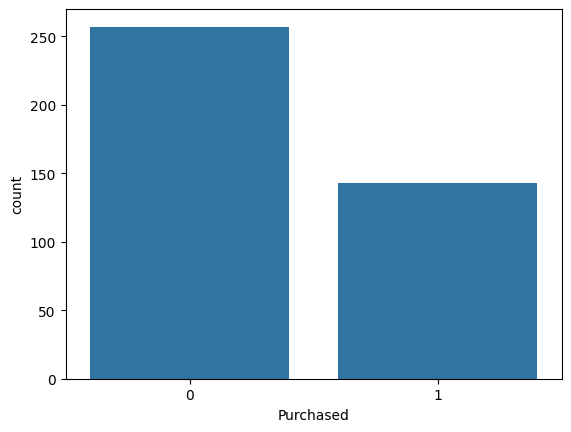

In [26]:
sns.countplot(x=y)

In [27]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [28]:
clasi = LogisticRegression()
clasi.fit(X_train, Y_train)

LogisticRegression()

In [29]:
Y_pred = clasi.predict(X_test)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_train: ", X_train.shape)

Shape of Y_train:  (300,)
Shape of X_train:  (300, 2)


In [31]:
print(Y_pred)
print("\n\n", Y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


 209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64


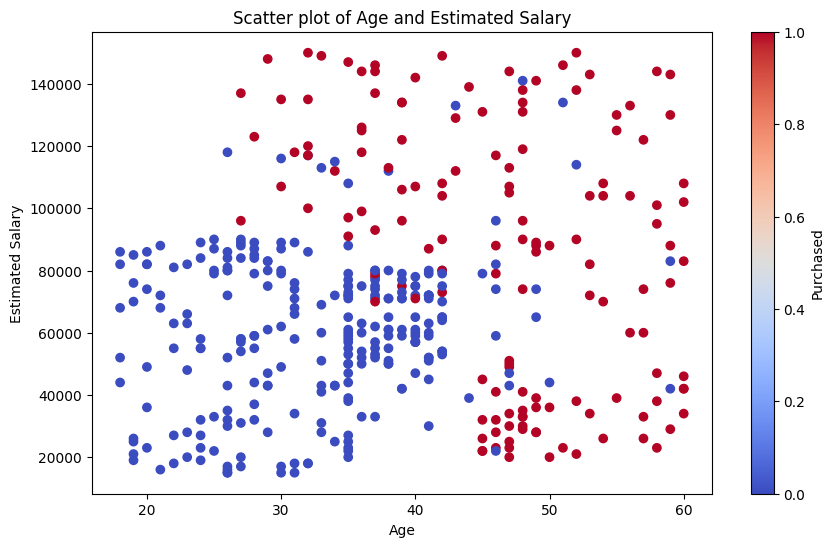

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with a color bar
scatter = ax.scatter(x['Age'], x['EstimatedSalary'], c=y, cmap='coolwarm')

# Create a color bar
cbar = plt.colorbar(scatter)

# Set the color bar label
cbar.set_label('Purchased')

# Set the title of the scatter plot
ax.set_title('Scatter plot of Age and Estimated Salary')

# Set the x and y axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')

# Display the scatter plot
plt.show()

In [33]:
pd.DataFrame(x_Scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


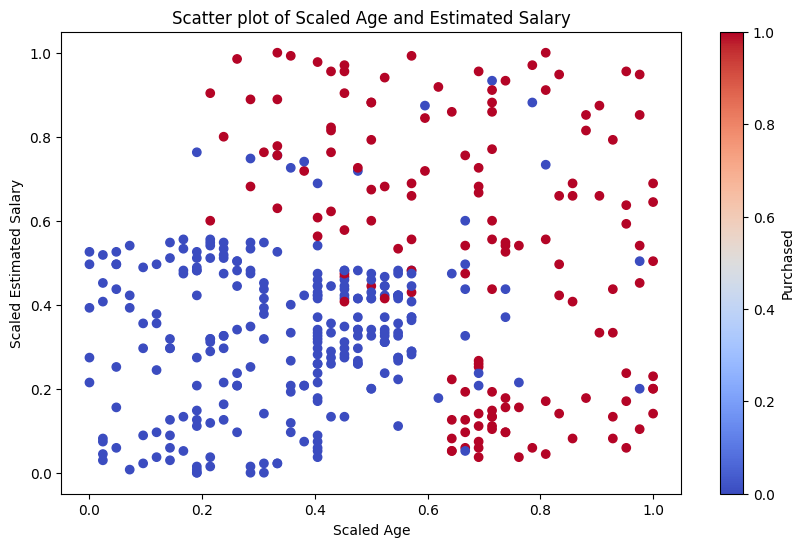

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with a color bar
scatter = ax.scatter(x_Scaled[:,0], x_Scaled[:,1], c=y, cmap='coolwarm')

# Create a color bar
cbar = plt.colorbar(scatter)

# Set the color bar label
cbar.set_label('Purchased')

# Set the title of the scatter plot
ax.set_title('Scatter plot of Scaled Age and Estimated Salary')

# Set the x and y axis labels
ax.set_xlabel('Scaled Age')
ax.set_ylabel('Scaled Estimated Salary')

# Display the scatter plot
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print("\n\n", Y_test.value_counts())

[[62  1]
 [12 25]]


 0    63
1    37
Name: Purchased, dtype: int64


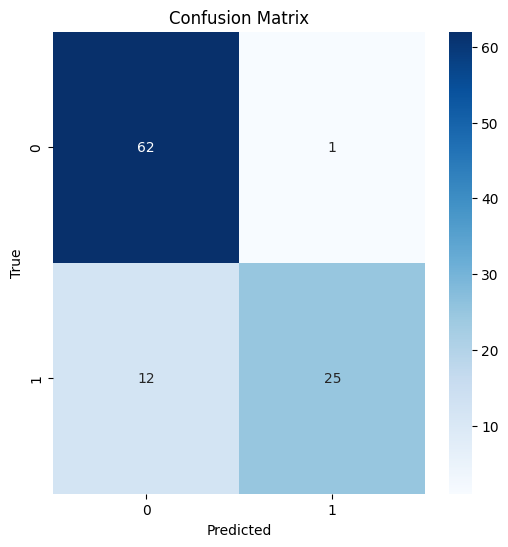

In [39]:
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Create a heatmap of the confusion matrix with a custom color map
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set the title of the confusion matrix
ax.set_title('Confusion Matrix')

# Set the x and y axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Display the confusion matrix
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Accuracy Score: \n", accuracy_score(Y_test,Y_pred))
print("\n\n Classification Report: \n", classification_report(Y_test,Y_pred))

Accuracy Score: 
 0.87


 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100

